In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



flights= pd.read_csv("./flights.csv")

#changes the way the df is printed, so it shows all cols without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
flights.shape

C:\Users\ethan\AppData\Local\Temp\ipykernel_21592\2010301311.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights= pd.read_csv("./flights.csv")


(5819079, 31)

In [53]:
airports=pd.read_csv("./airports.csv")
airports.head()
non_usa=airports[airports['COUNTRY']!='USA']
print(non_usa["COUNTRY"].unique())


[]


In [36]:
flights=pd.DataFrame(flights)
#flights.info(show_counts=True)#show_counts adds the null counts
print(flights.columns.tolist())

['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [37]:
#subsetting the dataset since it is too large to process it all

# I've decided to compare AmericanAirlines with Southwest
airlines=["WN","AA"]
comparison_db = flights.loc[(flights["AIRLINE"].isin(airlines))& (flights["MONTH"] == 12)]
#df is still  too large after only selecting 2 airlines
#we are only sellecting one month now

comparison_db.shape


(184038, 31)

<Axes: >

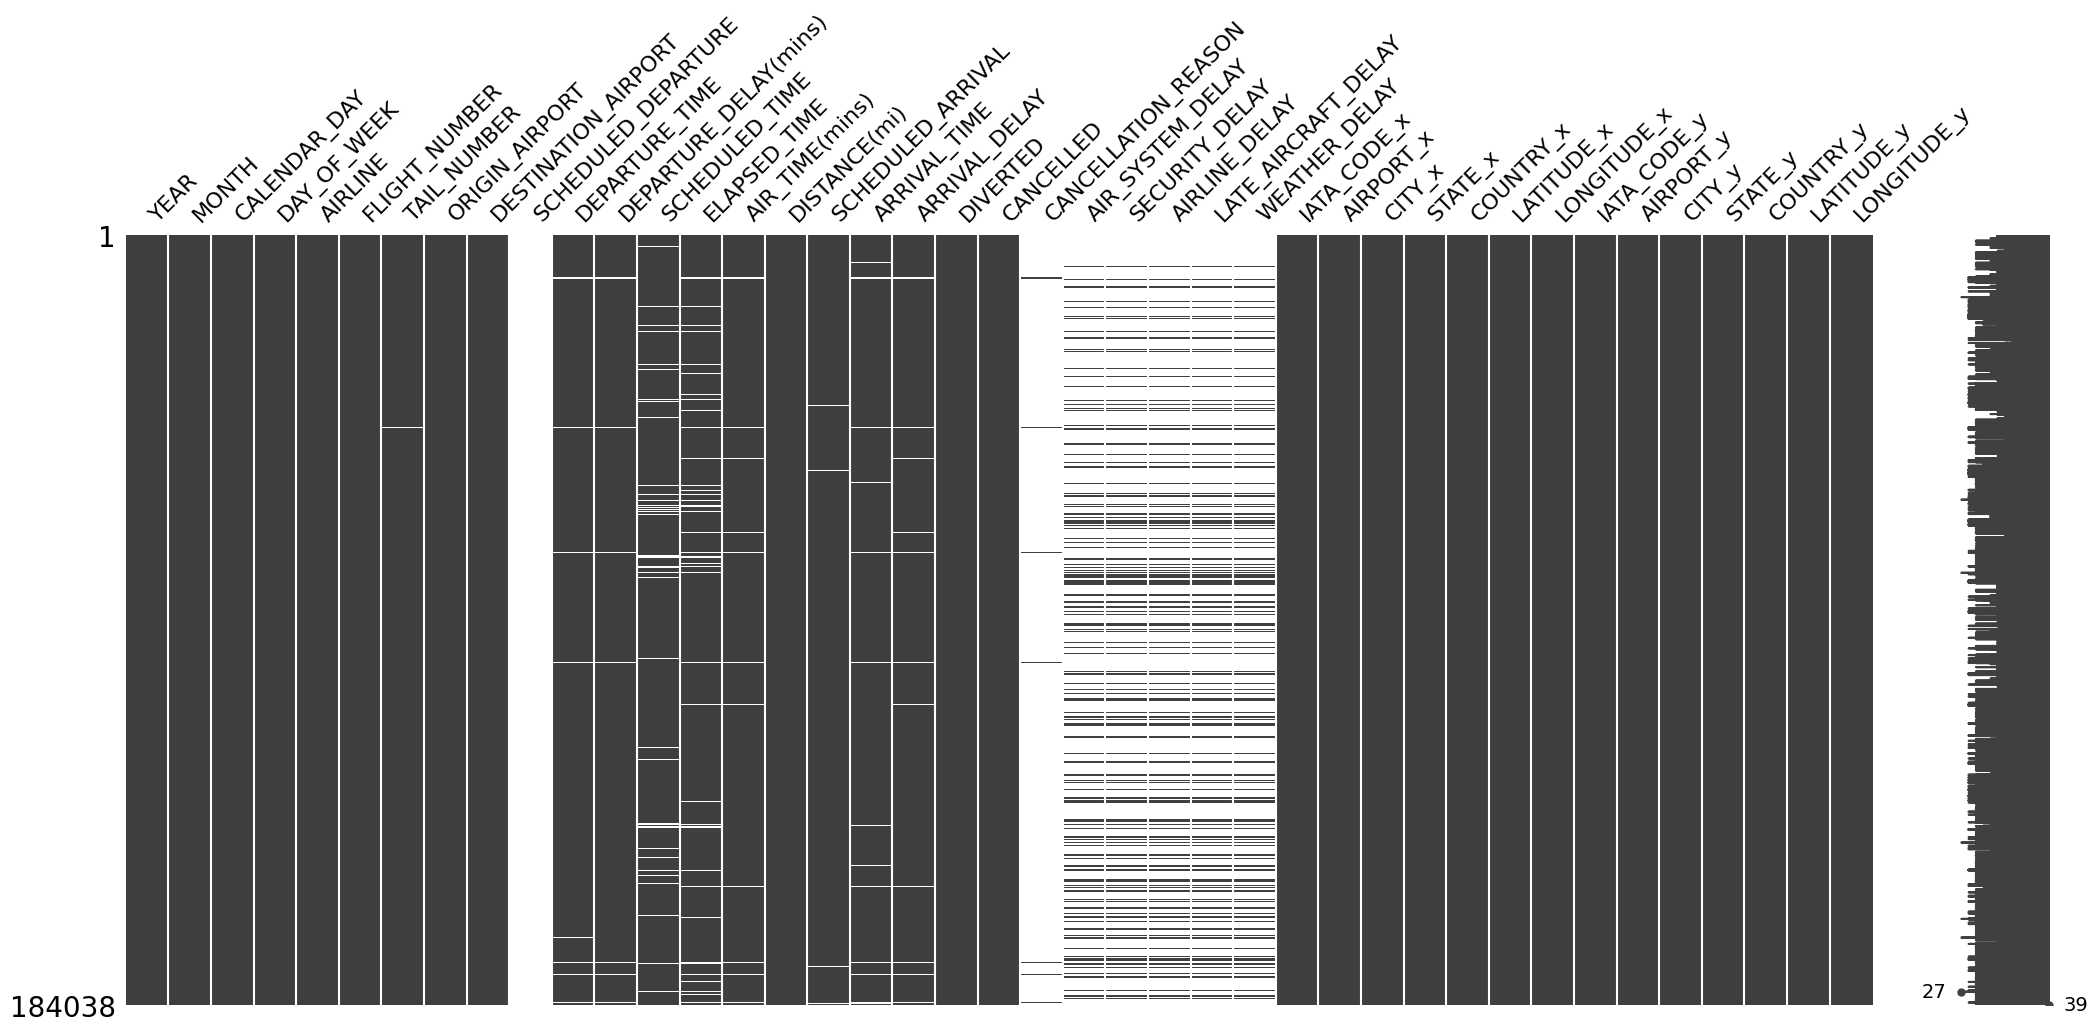

In [46]:
'''im using these graphs to visualize the missing data within the dataset, so i can compare to see if there is significant data loss
after I convert the times'''
import missingno as msno
msno.matrix(comparison_db)

In [48]:
# change time cols to a proper time format
bad_time=['SCHEDULED_DEPARTURE',"ARRIVAL_TIME","SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL","DEPARTURE_TIME",'SCHEDULED_TIME','ELAPSED_TIME' ]
#to test my funciton, I will make a sample data frame of the flights table
#this will make it faster to debug
sample_df = flights.sample(n=10000, random_state=42)

def change_time(time_cols,data):
    for col in time_cols:
        '''converting any na values to 9999. Since it isnt a valid time, it will be converted to NaT later'''
        data[col]=data[col].fillna(9999)
        #errors='coerse' converts any improper times are converted to NaT
        data[col] = pd.to_datetime(data[col], format='%H%M', errors='coerce')
        #formats the time to only show the hour and min, instead of the year month day and time
        data[col] = data[col].dt.strftime('%H:%M')
#change_time(bad_time,sample_df)
#sample_df.head()

change_time(bad_time,comparison_db)
comparison_db.head()


,YEAR,MONTH,CALENDAR_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY(mins),SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME(mins),DISTANCE(mi),SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,AIRPORT_x,CITY_x,STATE_x,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE_y,AIRPORT_y,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,December,1,Tuesday,AA,1230,N3KSAA,SEA,DFW,NaN,NaN,4.0,NaN,NaN,194.0,1660,NaN,NaN,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372
1,2015,December,1,Tuesday,AA,2406,N850AA,LAX,DFW,NaN,NaN,-3.0,NaN,NaN,141.0,1235,NaN,NaN,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372
2,2015,December,1,Tuesday,AA,2399,N879AA,LAX,DFW,NaN,NaN,1.0,NaN,NaN,136.0,1235,NaN,NaN,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372
3,2015,December,1,Tuesday,AA,185,N883AA,LAS,DFW,NaN,NaN,-4.0,NaN,NaN,118.0,1055,NaN,NaN,-30.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372
4,2015,December,1,Tuesday,AA,1051,N877AA,SFO,DFW,NaN,NaN,0.0,NaN,NaN,170.0,1464,NaN,NaN,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.0372


<Axes: >

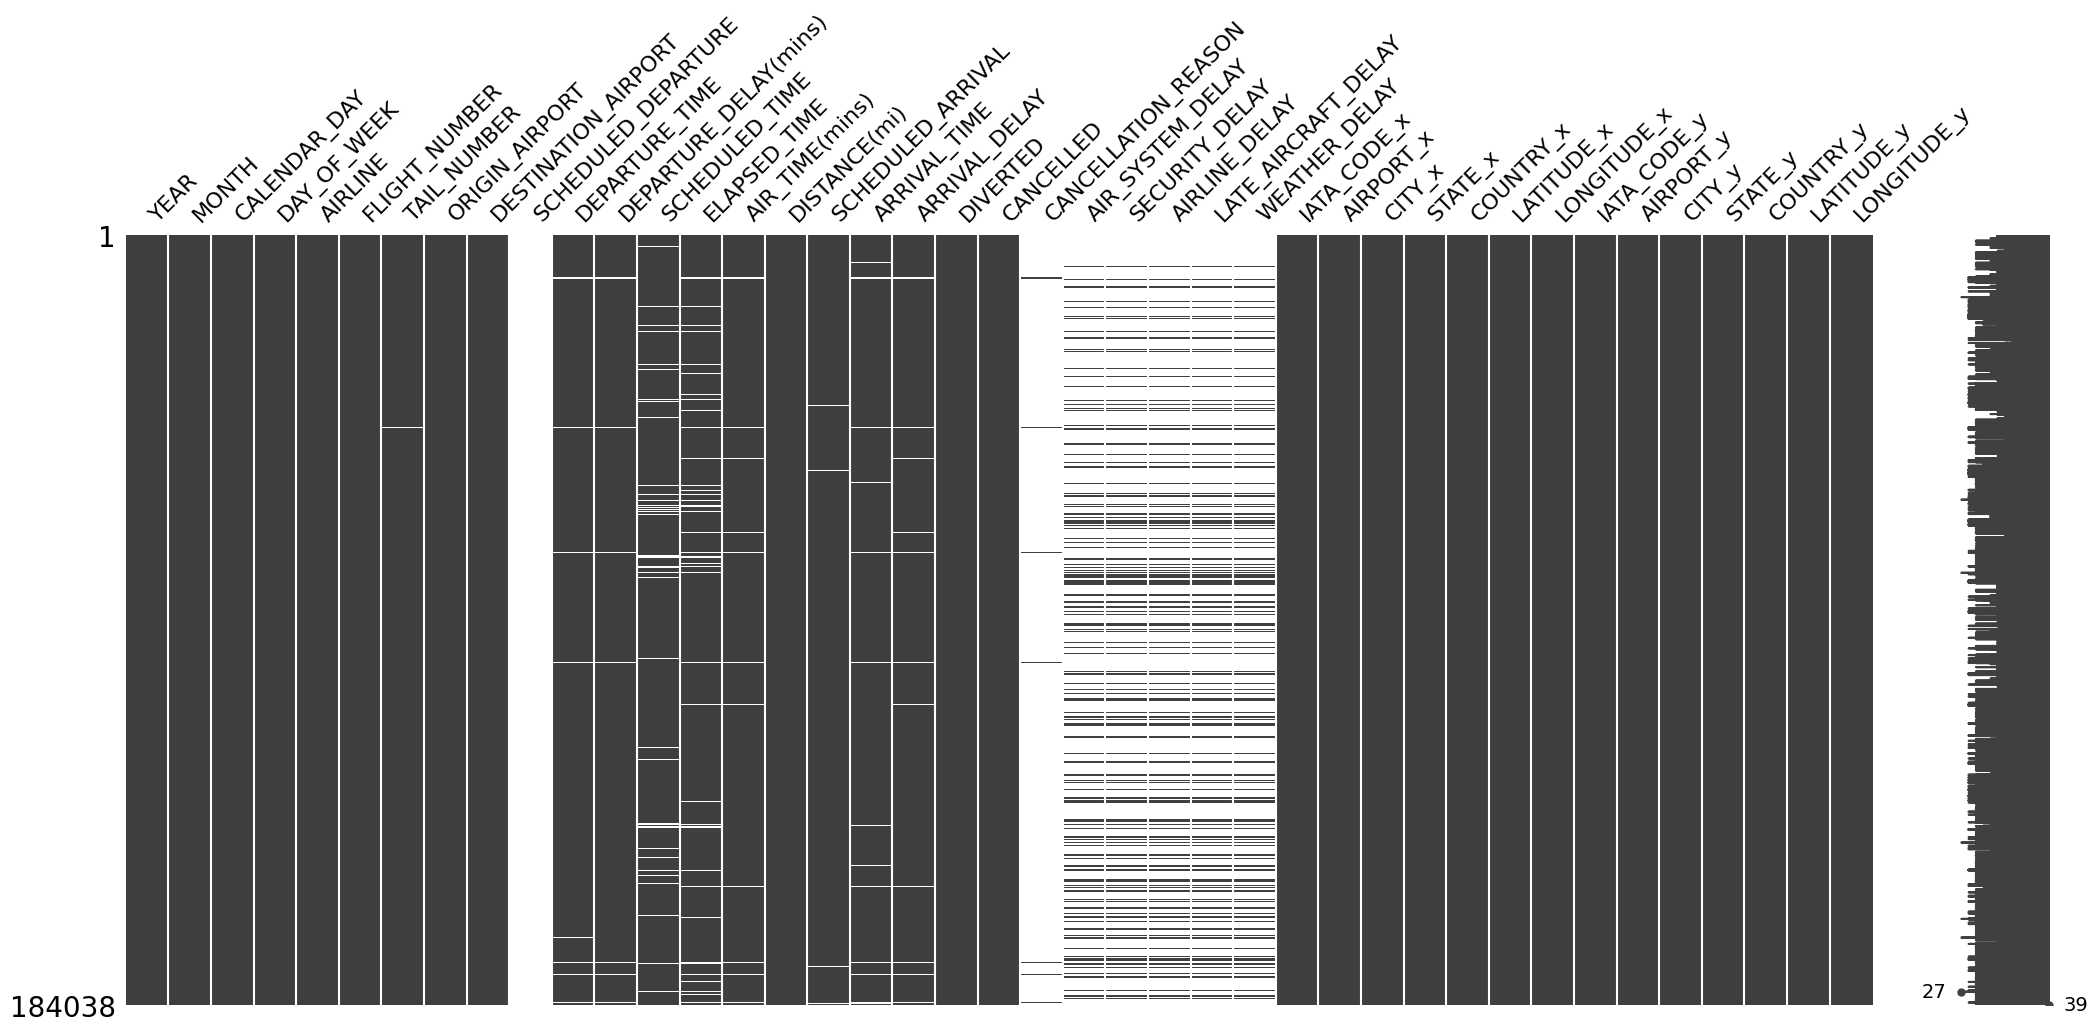

In [47]:
msno.matrix(comparison_db)

The code below will reomve unnecessqry columns and convert the datatypes of specific columns to make it more readable.

In [39]:
#removing cols that arent going to be used
comparison_db = comparison_db.drop(["TAXI_OUT", "WHEELS_OFF", "TAXI_IN","WHEELS_ON"], axis=1)

#change the month from an int to a string
import calendar
comparison_db["MONTH"] = comparison_db["MONTH"].apply(lambda x: calendar.month_name[int(x)])

'''the function "day_name" accepts ints between 0-6, and the data has ints of 1-7 so the '-1' in the lambda is there to convert the..
#desired format'''
comparison_db["DAY_OF_WEEK"] = comparison_db["DAY_OF_WEEK"].apply(lambda x: calendar.day_name[int(x)-1])

#renaming cols to be more accurate
comparison_db.rename(columns={
    "AIR_TIME": "AIR_TIME(mins)",
    "DISTANCE": "DISTANCE(mi)",
    "DEPARTURE_DELAY": "DEPARTURE_DELAY(mins)",
    "DAY":"CALENDAR_DAY"
}, inplace=True)
comparison_db.head()


,YEAR,MONTH,CALENDAR_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY(mins),SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME(mins),DISTANCE(mi),SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5339849,2015,December,1,Tuesday,AA,1230,N3KSAA,SEA,DFW,NaN,NaN,4.0,23:00,20:09,194.0,1660,05:55,05:38,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339851,2015,December,1,Tuesday,AA,2406,N850AA,LAX,DFW,NaN,NaN,-3.0,17:01,16:06,141.0,1235,05:01,04:53,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339853,2015,December,1,Tuesday,AA,883,N199UW,SFO,CLT,NaN,01:03,-2.0,NaN,NaN,264.0,2296,08:05,08:10,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339854,2015,December,1,Tuesday,AA,2020,N977UY,PHX,CLT,NaN,01:01,-4.0,22:06,19:08,182.0,1773,06:01,05:29,-32.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339857,2015,December,1,Tuesday,AA,448,N556UW,SLC,CLT,NaN,03:01,6.0,22:03,20:05,188.0,1727,06:08,05:56,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
comparison_db=pd.merge(comparison_db,airports,left_on='DESTINATION_AIRPORT',right_on='IATA_CODE',how="inner")
comparison_db.head

<bound method NDFrame.head of         YEAR     MONTH  CALENDAR_DAY DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE DEPARTURE_TIME  DEPARTURE_DELAY(mins) SCHEDULED_TIME ELAPSED_TIME  AIR_TIME(mins)  DISTANCE(mi) SCHEDULED_ARRIVAL ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY IATA_CODE_x                                AIRPORT_x             CITY_x STATE_x COUNTRY_x  LATITUDE_x  LONGITUDE_x IATA_CODE_y                                AIRPORT_y             CITY_y STATE_y COUNTRY_y  LATITUDE_y  LONGITUDE_y
0       2015  December             1     Tuesday      AA           1230      N3KSAA            SEA                 DFW                 NaN            NaN                    4.0          23:00        20:09           194.0          1660             05:55        05:38          -17.0         0          0                 NaN            

In [41]:
# Check if both DEPARTURE_TIME and ARRIVAL_TIME are missing -> this will show if a flight was cancelled
cancelled_flights_df = comparison_db[comparison_db['CANCELLED'] == 1]
cancelled_flights_df.shape


(2900, 34)

Attempt to make the data more readable

In [42]:
file_path1="./subsetted_data.csv"
comparison_db.to_csv(file_path1,index=False)

file_path2="./cancelled_flights.csv"
cancelled_flights_df.to_csv(file_path2,index=False)

#Change the name of the airports and airlines using the other csv'
#Maybe use a relational sql database

In [49]:
comparison_db.columns

Index(['YEAR', 'MONTH', 'CALENDAR_DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY(mins)', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME(mins)', 'DISTANCE(mi)', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'], dtype='object')